# Assginment (2023-06-22 ~ 2023-06-26)

## 2. `Headgear` Dataset



- import *module*

In [43]:
import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import cv2

- set the *data directory*

In [44]:
data_dir = '/NasData/home/knh/review/data'
headgear_dir = os.path.join(data_dir, 'headgear')
headgear_csv = os.path.join(headgear_dir, 'headgear.csv')

print(headgear_csv)

/NasData/home/knh/review/data/headgear/headgear.csv


### 1. load the data from the csv file
    - use `pd.read_csv()` function

In [45]:
# input your code in below
headgear_df = pd.read_csv(headgear_csv)


In [46]:
print(headgear_df)

      class id                filepaths     labels data set
0            0  train/ASCOT CAP/001.jpg  ASCOT CAP    train
1            0  train/ASCOT CAP/002.jpg  ASCOT CAP    train
2            0  train/ASCOT CAP/003.jpg  ASCOT CAP    train
3            0  train/ASCOT CAP/004.jpg  ASCOT CAP    train
4            0  train/ASCOT CAP/005.jpg  ASCOT CAP    train
...        ...                      ...        ...      ...
3815        19    valid/ZUCCHETTO/1.jpg  ZUCCHETTO    valid
3816        19    valid/ZUCCHETTO/2.jpg  ZUCCHETTO    valid
3817        19    valid/ZUCCHETTO/3.jpg  ZUCCHETTO    valid
3818        19    valid/ZUCCHETTO/4.jpg  ZUCCHETTO    valid
3819        19    valid/ZUCCHETTO/5.jpg  ZUCCHETTO    valid

[3820 rows x 4 columns]


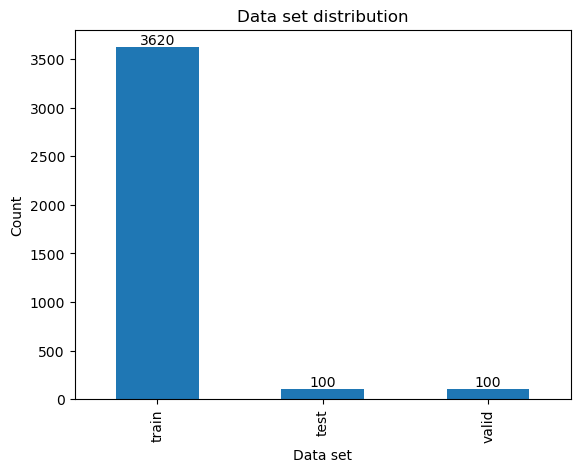

In [47]:
headgear_df['data set'].value_counts().plot(kind='bar')

plt.title('Data set distribution')
plt.xlabel('Data set')
plt.ylabel('Count')

for i in range(len(headgear_df['data set'].value_counts())):
    plt.text(i, headgear_df['data set'].value_counts()[i], headgear_df['data set'].value_counts()[i], ha='center', va='bottom')
    
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'PITH HELMET'),
  Text(1, 0, 'PORK PIE'),
  Text(2, 0, 'MILITARY HELMET'),
  Text(3, 0, 'FOOTBALL HELMET'),
  Text(4, 0, 'GARRISON CAP'),
  Text(5, 0, 'SOMBERO'),
  Text(6, 0, 'BICORNE'),
  Text(7, 0, 'BASEBALL CAP'),
  Text(8, 0, 'HARD HAT'),
  Text(9, 0, 'FEZ'),
  Text(10, 0, 'BOATER'),
  Text(11, 0, 'TOP HAT'),
  Text(12, 0, 'DEERSTALKER'),
  Text(13, 0, 'ASCOT CAP'),
  Text(14, 0, 'MOTARBOARD'),
  Text(15, 0, 'BOWLER'),
  Text(16, 0, 'FEDORA'),
  Text(17, 0, 'BERET'),
  Text(18, 0, 'ZUCCHETTO'),
  Text(19, 0, 'SOUTHWESTER')])

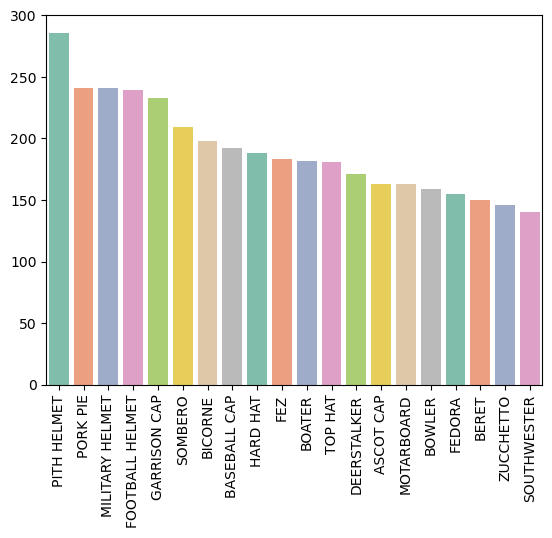

In [48]:
import seaborn as sns
data_dist = headgear_df['labels'].value_counts()
sns.barplot(x=data_dist.index, y=data_dist.values, alpha=0.9, palette='Set2')

plt.xticks(rotation='vertical')

### 2. check the data count
    - use `value_counts()` function

In [49]:
# input your code in below
headgear_df['data set'].value_counts()

train    3620
test      100
valid     100
Name: data set, dtype: int64

### 3. Split the data into train, valid, test set
- It need to filter the data with `data set` column

In [50]:
#### input your code in below
train_data_df = headgear_df[headgear_df['data set'] == 'train']
valid_data_df = headgear_df[headgear_df['data set'] == 'valid']
test_data_df = headgear_df[headgear_df['data set'] == 'test']

### 4. Make the `image_to_tensor` function

- use `cv2.imread()` function

In [51]:
headgear_dir = os.path.join(data_dir, 'headgear')

#### input your code in below
def image_to_tensor(data_df):
    data = []
    labels = []

    for index, row in data_df.iterrows():
        image_path = os.path.join(headgear_dir, row['filepaths'])
        image = cv2.imread(image_path)
        data.append(image)
        labels.append(row['labels'])

    return np.array(data), np.array(labels)
#########

In [52]:
train_data, train_labels = image_to_tensor(train_data_df)
valid_data, valid_labels = image_to_tensor(valid_data_df)
test_data, test_labels = image_to_tensor(test_data_df)

- Check the image shape

In [53]:
print('Train Data: ', len(train_data))
print('Train Labels: ', len(train_labels))
print('Train Data Shape: ', train_data[0].shape)

Train Data:  3620
Train Labels:  3620
Train Data Shape:  (224, 224, 3)


In [54]:
print('Valid Data: ', len(valid_data))
print('Valid Labels: ', len(valid_labels))
print('Valid Data Shape: ', valid_data[0].shape)

Valid Data:  100
Valid Labels:  100
Valid Data Shape:  (224, 224, 3)


In [55]:
print('Test Data: ', len(test_data))
print('Test Labels: ', len(test_labels))
print('Test Data Shape: ', test_data[0].shape)

Test Data:  100
Test Labels:  100
Test Data Shape:  (224, 224, 3)
